Import du CSV

In [47]:
import pandas as pd
import plotly.express as px

data = pd.read_csv("SpeedDatingData.csv")

In [48]:
data.shape

(8378, 195)

On crée une table avec les valeurs uniques pour avoir des infos sur chaque participant

In [49]:
data_users = data.drop_duplicates("iid")

In [50]:
data_users.shape

(551, 195)

Describe, affichage des données

In [51]:
pd.set_option('display.max_columns',None)
data.describe(include='all')

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,8378.000000,8368.000000,8378.000000,8220.000000,8378.000000,8274.000000,8305.000000,8289.000000,8289.000000,8289.000000,8280.000000,8271.000000,8249.000000,8378.000000,8166.000000,8091.000000,8072.000000,8018.000000,7656.000000,7302.000000,8128.000000,8060.000000,7993.000000,8283.000000,8315,8296.000000,4914,3133,3583,8315.000000,8299.000000,8299.000000,8299,7314,4279,8299.000000,8281.000000,8299.000000,8289,8240.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8277.000000,1800.000000,8299.000000,8299.000000,8299.000000,8289.000000,8279.000000,8257.000000,6489.000000,6489.000000,6489.000000,6489.000000,6489.000000,6467.000000,8299.000000,8299.000000,8299.000000,8299.000000,8289.000000,8289.000000,8273.000000,8273.000000,8273.000000,8273.000000,8273.000000,4906.000000,4906.000000,4906.000000,4906.000000,4906.000000,8378.000000,8176.000000,8101.000000,8082.000000,8028.000000,7666.000000,7311.000000,8138.000000,8069.000000,8003.000000,7205.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,7463.000000,7463.000000,7433.000000,1984.000000,1955.000000,1984.000000,1984.000000,1955.000000,1974.000000,7445.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.00000,5775.000000,5775.000000,5775.000000,5775.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,4377.000000,4377.000000,4377.000000,4377.000000,4377.000000,3974.000000,3974.000000,3974.000000,1496.000000,668.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2016.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259,NaN,241,68,115,NaN,NaN,NaN,269,409,261,NaN,NaN,NaN,367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [52]:
fig = px.histogram(data_users['age'])
fig.show()

In [53]:
import missingno as msno

<Axes: >

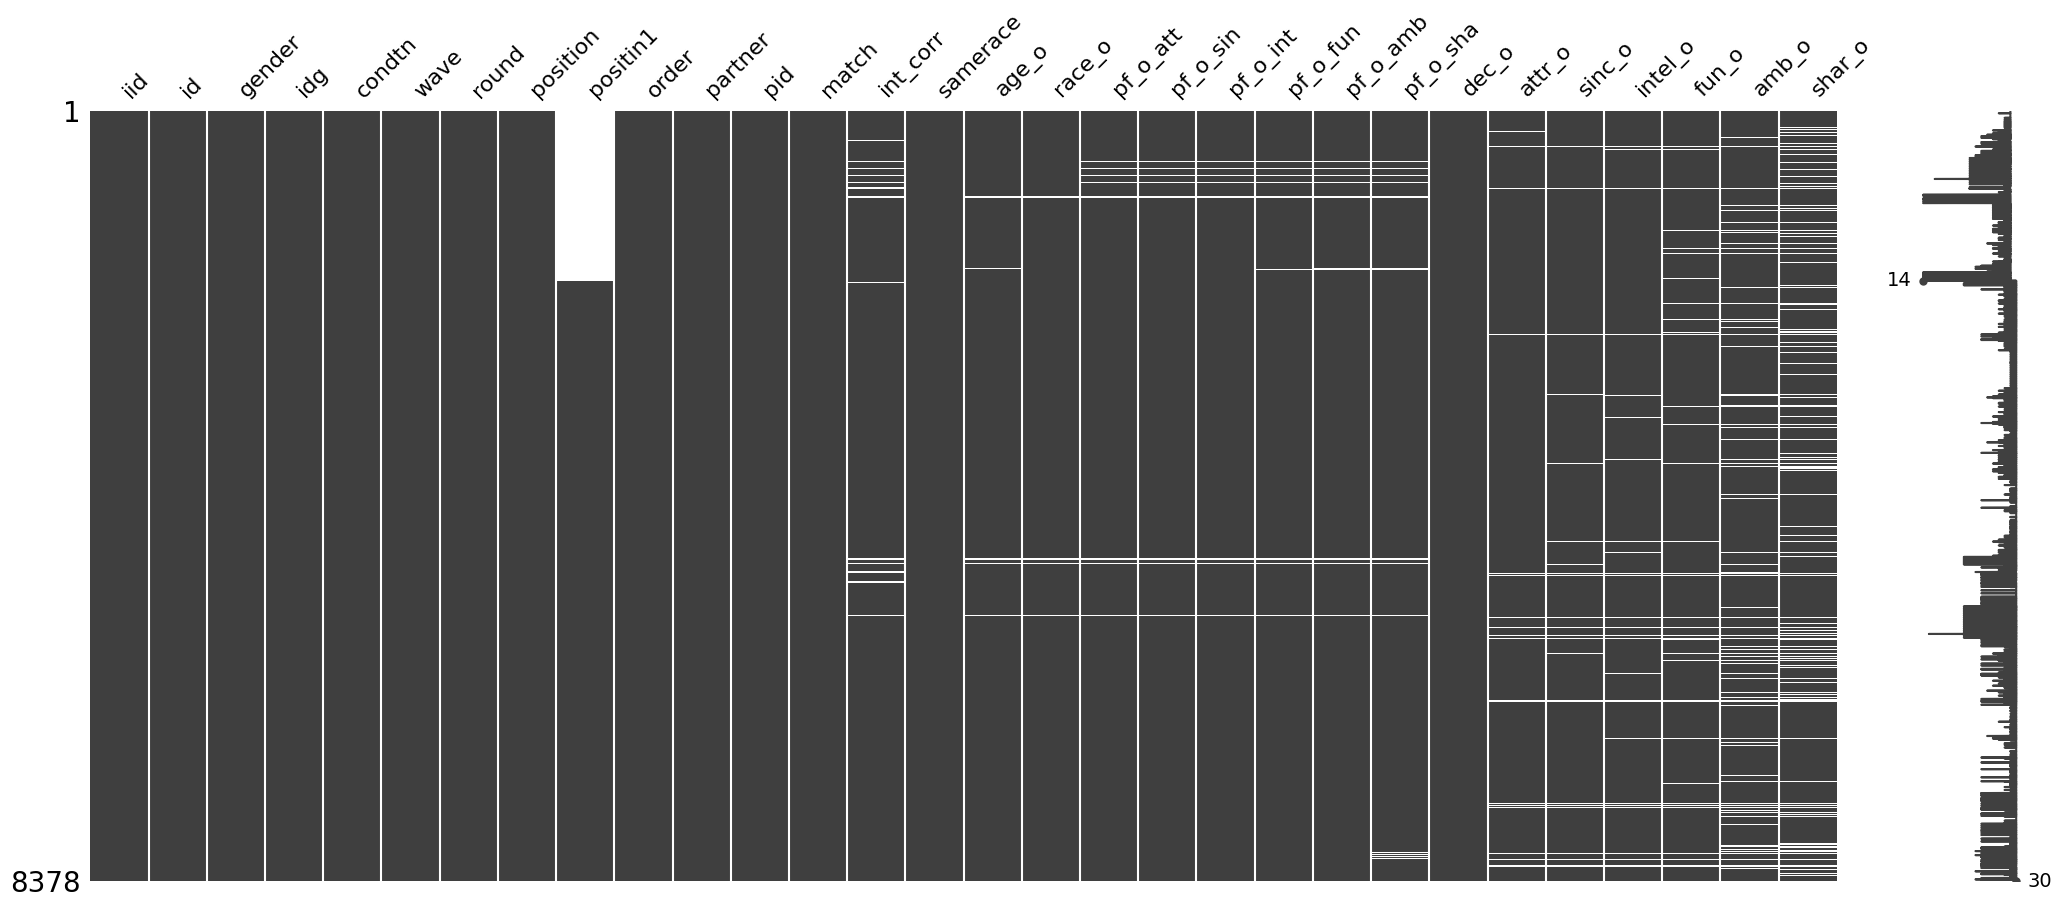

In [54]:
msno.matrix(data.iloc[:,0:30])


Pourcentage de NaN dans les âges

In [55]:
data['age'].value_counts(dropna=False, normalize=True)*100

age
27.0    12.640248
23.0    10.670804
26.0    10.372404
24.0    10.300788
25.0     9.990451
28.0     8.904273
22.0     7.818095
29.0     7.030317
30.0     6.851277
21.0     3.473383
32.0     2.506565
33.0     1.921700
34.0     1.814275
31.0     1.492003
NaN      1.133922
35.0     0.716161
20.0     0.656481
36.0     0.537121
19.0     0.238720
42.0     0.238720
38.0     0.226784
39.0     0.214848
18.0     0.119360
55.0     0.071616
37.0     0.059680
Name: proportion, dtype: float64

On parcourt les colonnes et on liste/supprime les colonnes qui ont plus de 20% de données manquantes

In [56]:
seuil = 0.2
count=0
data_filtered = data
for i in data.columns:
    na = data[i].isna().sum()
    total = data[i].value_counts(dropna=False).sum()
    if na/total > seuil:
        data_filtered= data_filtered.drop(columns=i)
        count +=1
        #print(i)
print("On a supprimé",count,"colonnes avec un taux de valeurs vides supérieur à",seuil*100,"%")

On a supprimé 90 colonnes avec un taux de valeurs vides supérieur à 20.0 %


On sélectionne uniquement les colonnnes pertinentes parmi celles qui restent. On se base sur la documentation pour évaluer subjectivement la pertinence de chaque colonne. On a sélectionné les valeurs pour MVP.

In [57]:
data_final= data_filtered[['iid','gender','match','dec','dec_o','pid','samerace','age_o','race_o','age','attr_o','race','field','go_out','goal','career_c','sports','tvsports','exercise','dining','museums','art','hiking','gaming','clubbing','reading','tv','theater','movies','concerts','music','shopping','yoga','from']]

On remarque que pour 10 lignes il y a un problème car il y a eu un date sans "deuxième" personne (pid = NaN). On les supprime car elles ne sont pas cohérentes avec la description d'un date qui implique deux personnes

In [58]:
data_final= data_final[data_final["pid"].isna()==False]

On crée une table avec les infos du pid et ses données propres, pour avoir sur une ligne toutes les infos d'un date (avec les infos du participant x et celles du participant y)

In [59]:
data_du_pid= data_final[['iid','gender','field','go_out','goal','career_c','sports','tvsports','exercise','dining','museums','art','hiking','gaming','clubbing','reading','tv','theater','movies','concerts','music','shopping','yoga','from']]

On merge les deux tables

In [60]:
data_joined = pd.merge(data_final,data_du_pid, left_on= "pid", right_on="iid")
data_joined.head()

,iid_x,gender_x,match,dec,dec_o,pid,samerace,age_o,race_o,age,attr_o,race,field_x,go_out_x,goal_x,career_c_x,sports_x,tvsports_x,exercise_x,dining_x,museums_x,art_x,hiking_x,gaming_x,clubbing_x,reading_x,tv_x,theater_x,movies_x,concerts_x,music_x,shopping_x,yoga_x,from_x,iid_y,gender_y,field_y,go_out_y,goal_y,career_c_y,sports_y,tvsports_y,exercise_y,dining_y,museums_y,art_y,hiking_y,gaming_y,clubbing_y,reading_y,tv_y,theater_y,movies_y,concerts_y,music_y,shopping_y,yoga_y,from_y
0,1,0,0,1,0,11.0,0,27.0,2.0,21.0,6.0,4.0,Law,1.0,2.0,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,Chicago,11,1,Finance,4.0,1.0,2.0,8.0,7.0,2.0,6.0,7.0,5.0,5.0,5.0,4.0,9.0,2.0,4.0,8.0,7.0,8.0,5.0,1.0,Argentina
1,1,0,0,1,0,11.0,0,27.0,2.0,21.0,6.0,4.0,Law,1.0,2.0,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,Chicago,11,1,Finance,4.0,1.0,2.0,8.0,7.0,2.0,6.0,7.0,5.0,5.0,5.0,4.0,9.0,2.0,4.0,8.0,7.0,8.0,5.0,1.0,Argentina
2,1,0,0,1,0,11.0,0,27.0,2.0,21.0,6.0,4.0,Law,1.0,2.0,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,Chicago,11,1,Finance,4.0,1.0,2.0,8.0,7.0,2.0,6.0,7.0,5.0,5.0,5.0,4.0,9.0,2.0,4.0,8.0,7.0,8.0,5.0,1.0,Argentina
3,1,0,0,1,0,11.0,0,27.0,2.0,21.0,6.0,4.0,Law,1.0,2.0,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,Chicago,11,1,Finance,4.0,1.0,2.0,8.0,7.0,2.0,6.0,7.0,5.0,5.0,5.0,4.0,9.0,2.0,4.0,8.0,7.0,8.0,5.0,1.0,Argentina
4,1,0,0,1,0,11.0,0,27.0,2.0,21.0,6.0,4.0,Law,1.0,2.0,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,Chicago,11,1,Finance,4.0,1.0,2.0,8.0,7.0,2.0,6.0,7.0,5.0,5.0,5.0,4.0,9.0,2.0,4.0,8.0,7.0,8.0,5.0,1.0,Argentina


<Axes: xlabel='tvsports', ylabel='Count'>

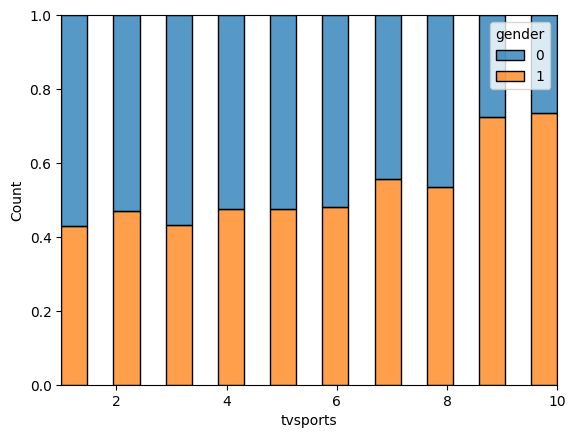

In [61]:
import seaborn as sns

sns.histplot(data=data_final,x="tvsports",hue="gender",multiple="fill")

<Axes: xlabel='gender', ylabel='Count'>

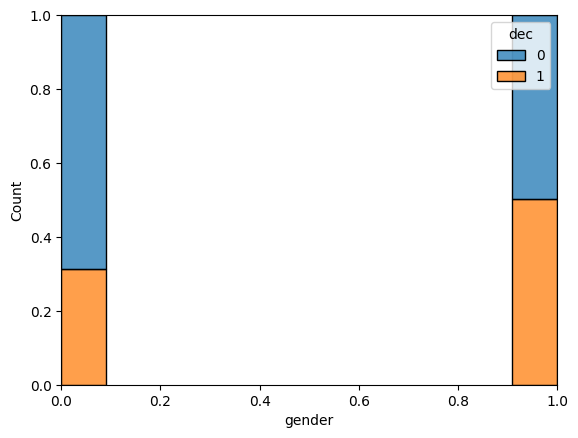

In [62]:
sns.histplot(data_users,x="gender", hue="dec", multiple="fill")

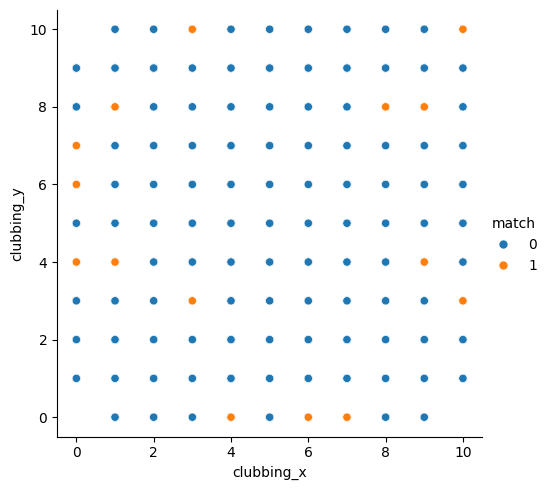

In [76]:
sns.relplot(data_joined,x="clubbing_x",y="clubbing_y", hue="match")

In [64]:
data_joined.head()

,iid_x,gender_x,match,dec,dec_o,pid,samerace,age_o,race_o,age,attr_o,race,field_x,go_out_x,goal_x,career_c_x,sports_x,tvsports_x,exercise_x,dining_x,museums_x,art_x,hiking_x,gaming_x,clubbing_x,reading_x,tv_x,theater_x,movies_x,concerts_x,music_x,shopping_x,yoga_x,from_x,iid_y,gender_y,field_y,go_out_y,goal_y,career_c_y,sports_y,tvsports_y,exercise_y,dining_y,museums_y,art_y,hiking_y,gaming_y,clubbing_y,reading_y,tv_y,theater_y,movies_y,concerts_y,music_y,shopping_y,yoga_y,from_y
0,1,0,0,1,0,11.0,0,27.0,2.0,21.0,6.0,4.0,Law,1.0,2.0,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,Chicago,11,1,Finance,4.0,1.0,2.0,8.0,7.0,2.0,6.0,7.0,5.0,5.0,5.0,4.0,9.0,2.0,4.0,8.0,7.0,8.0,5.0,1.0,Argentina
1,1,0,0,1,0,11.0,0,27.0,2.0,21.0,6.0,4.0,Law,1.0,2.0,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,Chicago,11,1,Finance,4.0,1.0,2.0,8.0,7.0,2.0,6.0,7.0,5.0,5.0,5.0,4.0,9.0,2.0,4.0,8.0,7.0,8.0,5.0,1.0,Argentina
2,1,0,0,1,0,11.0,0,27.0,2.0,21.0,6.0,4.0,Law,1.0,2.0,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,Chicago,11,1,Finance,4.0,1.0,2.0,8.0,7.0,2.0,6.0,7.0,5.0,5.0,5.0,4.0,9.0,2.0,4.0,8.0,7.0,8.0,5.0,1.0,Argentina
3,1,0,0,1,0,11.0,0,27.0,2.0,21.0,6.0,4.0,Law,1.0,2.0,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,Chicago,11,1,Finance,4.0,1.0,2.0,8.0,7.0,2.0,6.0,7.0,5.0,5.0,5.0,4.0,9.0,2.0,4.0,8.0,7.0,8.0,5.0,1.0,Argentina
4,1,0,0,1,0,11.0,0,27.0,2.0,21.0,6.0,4.0,Law,1.0,2.0,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,Chicago,11,1,Finance,4.0,1.0,2.0,8.0,7.0,2.0,6.0,7.0,5.0,5.0,5.0,4.0,9.0,2.0,4.0,8.0,7.0,8.0,5.0,1.0,Argentina


In [65]:
data_age_genre_race_go_out_career = data_joined[['match','age','field_x','go_out_x','goal_x','career_c_x','age_o','field_y','go_out_y','goal_y','career_c_y']]

In [66]:
data_age_genre_race_go_out_career.head()

,match,age,field_x,go_out_x,goal_x,career_c_x,age_o,field_y,go_out_y,goal_y,career_c_y
0,0,21.0,Law,1.0,2.0,NaN,27.0,Finance,4.0,1.0,2.0
1,0,21.0,Law,1.0,2.0,NaN,27.0,Finance,4.0,1.0,2.0
2,0,21.0,Law,1.0,2.0,NaN,27.0,Finance,4.0,1.0,2.0
3,0,21.0,Law,1.0,2.0,NaN,27.0,Finance,4.0,1.0,2.0
4,0,21.0,Law,1.0,2.0,NaN,27.0,Finance,4.0,1.0,2.0


In [67]:
data_age_genre_race_go_out_career = data_age_genre_race_go_out_career[data_age_genre_race_go_out_career['match']==1]

In [68]:
data_age_genre_race_go_out_career_sans_match=data_age_genre_race_go_out_career.drop(columns="match")

In [85]:
data_joined.columns

Index(['match', 'sports_x', 'tvsports_x', 'exercise_x', 'dining_x',
       'museums_x', 'art_x', 'hiking_x', 'gaming_x', 'clubbing_x', 'reading_x',
       'tv_x', 'theater_x', 'movies_x', 'concerts_x', 'music_x', 'shopping_x',
       'yoga_x', 'sports_y', 'tvsports_y', 'exercise_y', 'dining_y',
       'museums_y', 'art_y', 'hiking_y', 'gaming_y', 'clubbing_y', 'reading_y',
       'tv_y', 'theater_y', 'movies_y', 'concerts_y', 'music_y', 'shopping_y',
       'yoga_y'],
      dtype='object')

In [84]:
data_joined = data_joined.drop(columns={'from_y'})

In [88]:
data_joined = data_joined[data_joined["match"]==1]

In [106]:

data_corr = data_joined.corr(numeric_only=True)
display(data_corr)

,match,sports_x,tvsports_x,exercise_x,dining_x,museums_x,art_x,hiking_x,gaming_x,clubbing_x,reading_x,tv_x,theater_x,movies_x,concerts_x,music_x,shopping_x,yoga_x,sports_y,tvsports_y,exercise_y,dining_y,museums_y,art_y,hiking_y,gaming_y,clubbing_y,reading_y,tv_y,theater_y,movies_y,concerts_y,music_y,shopping_y,yoga_y
match,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sports_x,NaN,1.000000,0.515611,0.395198,-0.046501,-0.239924,-0.245122,0.154644,0.173671,-0.012139,-0.143063,-0.106581,-0.328506,-0.219138,-0.144952,-0.070601,-0.121704,-0.086015,-0.049071,-0.034932,0.039162,0.032863,0.054480,0.051768,0.053237,-0.070086,-0.000197,0.042736,0.030756,0.061744,0.026204,-0.024231,-0.015769,0.068767,0.047287
tvsports_x,NaN,0.515611,1.000000,0.258077,-0.027188,-0.122474,-0.141270,-0.026950,0.276878,0.000466,-0.106532,0.218043,-0.081986,-0.078217,0.015466,0.077123,0.065701,-0.048801,-0.030262,-0.036302,0.055902,0.006283,0.026865,0.038624,0.026874,-0.026021,0.027281,-0.007020,0.055525,0.058493,0.020687,0.043580,0.019906,0.066087,0.036085
exercise_x,NaN,0.395198,0.258077,1.000000,0.123536,-0.020778,-0.024626,0.067655,0.030059,0.016900,-0.010748,0.037123,-0.062496,-0.105243,-0.099047,-0.016766,0.094896,0.088699,0.036339,0.055005,0.039232,0.022231,0.012595,-0.012688,-0.055851,-0.015367,0.020244,0.001872,0.012251,-0.038433,-0.037568,-0.052826,-0.000729,0.003443,-0.022818
dining_x,NaN,-0.046501,-0.027188,0.123536,1.000000,0.412531,0.369752,0.049589,0.107342,0.218332,0.072263,0.153169,0.302688,0.243445,0.220074,0.151570,0.426908,0.175727,0.032537,0.008993,0.018515,-0.001234,-0.018245,-0.011150,-0.044344,0.020172,0.090037,-0.049557,-0.030406,-0.070296,-0.025405,-0.023472,-0.015797,-0.010589,-0.007151
museums_x,NaN,-0.239924,-0.122474,-0.020778,0.412531,1.000000,0.885078,0.134107,-0.090403,0.172562,0.218036,0.080513,0.596651,0.401843,0.399294,0.291419,0.314135,0.312112,0.053743,0.027162,0.014077,-0.015152,-0.059248,-0.067084,-0.042265,0.032305,0.004862,-0.028569,-0.052629,-0.081931,-0.048961,-0.041884,-0.033854,-0.070817,-0.014475
art_x,NaN,-0.245122,-0.141270,-0.024626,0.369752,0.885078,1.000000,0.145366,-0.091430,0.194880,0.168907,0.079584,0.547811,0.396408,0.425112,0.320639,0.274843,0.333452,0.050980,0.039983,-0.010817,-0.008248,-0.066889,-0.074940,-0.052078,0.040586,0.001662,-0.054793,-0.041859,-0.077398,-0.043053,-0.026425,-0.019369,-0.056274,-0.011585
hiking_x,NaN,0.154644,-0.026950,0.067655,0.049589,0.134107,0.145366,1.000000,0.123979,-0.001328,0.068471,-0.164937,0.043447,-0.050317,0.113445,0.038211,-0.088790,0.225505,0.049193,0.025692,-0.055393,-0.041741,-0.042336,-0.051167,0.035022,0.028397,-0.052735,0.032119,-0.078165,-0.077910,0.002694,-0.054181,0.004949,-0.118376,-0.040223
gaming_x,NaN,0.173671,0.276878,0.030059,0.107342,-0.090403,-0.091430,0.123979,1.000000,0.212860,-0.034863,0.163731,-0.089439,-0.035234,0.059052,0.029560,0.097278,-0.047650,-0.068124,-0.027428,-0.015422,0.019881,0.034572,0.042172,0.034030,-0.039244,0.017675,0.038278,0.058090,0.073907,0.029383,0.014196,-0.006257,0.057217,0.003558
clubbing_x,NaN,-0.012139,0.000466,0.016900,0.218332,0.172562,0.194880,-0.001328,0.212860,1.000000,-0.104089,0.017123,0.185054,0.211365,0.153205,0.107897,0.191961,0.132103,0.003281,0.029940,0.018798,0.089816,0.009620,0.005868,-0.050742,0.019359,0.126912,-0.064601,0.044694,0.018435,0.033777,0.019658,0.027856,0.046103,0.065328


In [119]:
data_corr["museums_y"].sort_values(ascending=False)


museums_y     1.000000
art_y         0.884242
theater_y     0.594803
dining_y      0.410684
concerts_y    0.399171
movies_y      0.396392
shopping_y    0.310420
yoga_y        0.309274
music_y       0.285258
reading_y     0.220895
clubbing_y    0.173191
hiking_y      0.143142
tv_y          0.076364
sports_x      0.054480
gaming_x      0.034572
tvsports_x    0.026865
exercise_x    0.012595
clubbing_x    0.009620
yoga_x       -0.017522
dining_x     -0.018245
exercise_y   -0.024527
reading_x    -0.025175
music_x      -0.032796
hiking_x     -0.042336
concerts_x   -0.044279
movies_x     -0.050158
tv_x         -0.052290
museums_x    -0.059248
art_x        -0.066889
shopping_x   -0.074443
theater_x    -0.085223
gaming_y     -0.090054
tvsports_y   -0.127613
sports_y     -0.242597
match              NaN
Name: museums_y, dtype: float64

<Axes: >

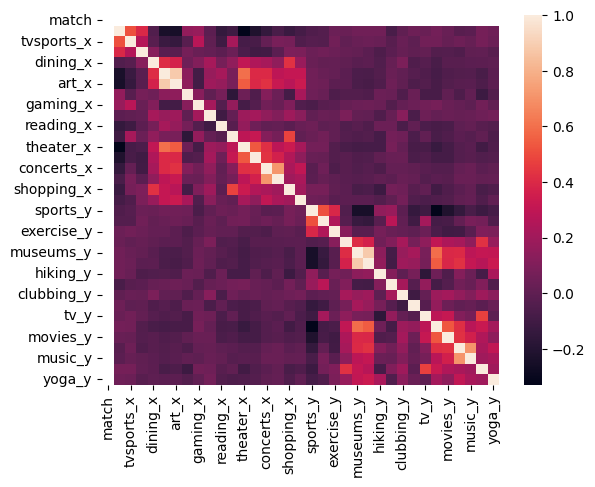

In [90]:
sns.heatmap(data_corr)